In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats


### 1. 데이터 불러오기

In [2]:
young = pd.read_csv('data/data_final.csv', encoding = 'utf-8-sig')
young.head()

,가구구분코드,가구원수,가구주_관계코드,가구주_성별코드,가구주_연령,가구주_학력코드,가구주_수학구분코드,가구주_취업여부,가구주_7차직업분류코드,가구주_종사상지위코드,...,가계지출_소비지출_오락문화_기타인쇄물구입비,가계지출_소비지출_오락문화_문구구입비,가계지출_소비지출_오락문화_단체여행경비,가계지출_소비지출_교육비,가계지출_소비지출_음식숙박비,가계지출_소비지출_음식숙박_식대,가계지출_소비지출_음식숙박_숙박비,가계지출_소비지출_기타상품서비스이용금액,도시읍면부구분코드,조사연도
0,1,1,1,1,31,4,1,1,3,1.0,...,0,0,0,0,279000,279000,0,525719,1,2019
1,1,1,1,1,34,5,1,1,3,1.0,...,0,0,0,0,597385,597385,0,7500,1,2019
2,1,1,1,1,34,6,1,1,3,1.0,...,0,1500,0,0,96133,96133,0,71481,0,2019
3,1,1,1,1,34,6,1,1,9,1.0,...,0,0,0,0,435500,435500,0,71914,1,2019
4,1,1,1,1,19,4,1,1,3,1.0,...,0,0,0,0,458255,458255,0,66378,1,2019


In [3]:
young.describe()

,가구구분코드,가구원수,가구주_관계코드,가구주_성별코드,가구주_연령,가구주_학력코드,가구주_수학구분코드,가구주_취업여부,가구주_종사상지위코드,입주형태코드,...,가계지출_소비지출_오락문화_기타인쇄물구입비,가계지출_소비지출_오락문화_문구구입비,가계지출_소비지출_오락문화_단체여행경비,가계지출_소비지출_교육비,가계지출_소비지출_음식숙박비,가계지출_소비지출_음식숙박_식대,가계지출_소비지출_음식숙박_숙박비,가계지출_소비지출_기타상품서비스이용금액,도시읍면부구분코드,조사연도
count,4501.000000,4501.0,4501.0,4501.000000,4501.000000,4501.000000,4501.000000,4501.0,4501.000000,4501.000000,...,4501.000000,4501.000000,4.501000e+03,4.501000e+03,4.501000e+03,4.501000e+03,4.501000e+03,4.501000e+03,4501.000000,4501.000000
mean,1.088203,1.0,1.0,1.475894,28.147745,5.597645,1.269496,1.0,1.655410,4.918685,...,728.372806,2314.498334,2.491078e+04,4.451852e+04,4.071825e+05,3.871320e+05,2.005050e+04,1.314090e+05,0.916685,2021.837147
std,0.283621,0.0,0.0,0.499474,3.671171,0.885982,0.749237,0.0,1.344168,1.490581,...,7017.053274,8245.843861,1.190582e+05,1.568537e+05,2.215045e+05,2.039146e+05,5.543499e+04,1.823384e+05,0.276388,1.639758
min,1.000000,1.0,1.0,1.000000,19.000000,2.000000,1.000000,1.0,1.000000,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2019.000000
25%,1.000000,1.0,1.0,1.000000,26.000000,5.000000,1.000000,1.0,1.000000,4.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,2.605500e+05,2.500980e+05,0.000000e+00,4.783600e+04,1.000000,2020.000000
50%,1.000000,1.0,1.0,1.000000,28.000000,6.000000,1.000000,1.0,1.000000,6.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,3.679000e+05,3.523500e+05,0.000000e+00,8.936700e+04,1.000000,2022.000000
75%,1.000000,1.0,1.0,2.000000,31.000000,6.000000,1.000000,1.0,2.000000,6.000000,...,0.000000,1750.000000,0.000000e+00,0.000000e+00,5.133520e+05,4.849460e+05,1.800000e+04,1.553740e+05,1.000000,2023.000000
max,2.000000,1.0,1.0,2.000000,34.000000,8.000000,5.000000,1.0,7.000000,7.000000,...,247850.000000,337388.000000,3.000000e+06,2.069000e+06,2.484830e+06,2.434830e+06,1.148933e+06,3.650662e+06,1.000000,2024.000000


### 2. 불필요한 데이터 내 데이터셋에서 제외

In [4]:
selected_columns = [
    '가구주_성별코드', '가구주_연령', '가구주_학력코드',
    '가구주_7차직업분류코드', '가구주_종사상지위코드',
    '소득구간코드', '가계지출금액', '가계지출_소비지출금액',
    '가계지출_소비지출_식료품비주류음료구입비', '가계지출_소비지출_음식숙박비',
    '가계지출_소비지출_음식숙박_식대', '가계지출_소비지출_음식숙박_숙박비','조사연도'
]

young2 = young[selected_columns].copy()
print(young2.head())

   가구주_성별코드  가구주_연령  가구주_학력코드 가구주_7차직업분류코드  가구주_종사상지위코드  소득구간코드   가계지출금액  \
0         1      31         4            3          1.0       4  4968138   
1         1      34         5            3          1.0       5  4487267   
2         1      34         6            3          1.0       6  6129518   
3         1      34         6            9          1.0       5  2721557   
4         1      19         4            3          1.0       3  2665048   

   가계지출_소비지출금액  가계지출_소비지출_식료품비주류음료구입비  가계지출_소비지출_음식숙박비  가계지출_소비지출_음식숙박_식대  \
0      2845989                 734800           279000             279000   
1      1745827                  74205           597385             597385   
2       594445                  37673            96133              96133   
3      1029301                  17913           435500             435500   
4      1573323                  53345           458255             458255   

   가계지출_소비지출_음식숙박_숙박비  조사연도  
0                   0  2019  
1                   

In [5]:
young2.describe()

,가구주_성별코드,가구주_연령,가구주_학력코드,가구주_종사상지위코드,소득구간코드,가계지출금액,가계지출_소비지출금액,가계지출_소비지출_식료품비주류음료구입비,가계지출_소비지출_음식숙박비,가계지출_소비지출_음식숙박_식대,가계지출_소비지출_음식숙박_숙박비,조사연도
count,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4.501000e+03,4.501000e+03,4501.000000,4.501000e+03,4.501000e+03,4.501000e+03,4501.000000
mean,1.475894,28.147745,5.597645,1.655410,3.646523,2.365787e+06,1.811848e+06,126241.455899,4.071825e+05,3.871320e+05,2.005050e+04,2021.837147
std,0.499474,3.671171,0.885982,1.344168,1.469287,1.516345e+06,1.282799e+06,81946.437225,2.215045e+05,2.039146e+05,5.543499e+04,1.639758
min,1.000000,19.000000,2.000000,1.000000,1.000000,3.347460e+05,3.087720e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2019.000000
25%,1.000000,26.000000,5.000000,1.000000,3.000000,1.583713e+06,1.227333e+06,69263.000000,2.605500e+05,2.500980e+05,0.000000e+00,2020.000000
50%,1.000000,28.000000,6.000000,1.000000,3.000000,2.096728e+06,1.599957e+06,110375.000000,3.679000e+05,3.523500e+05,0.000000e+00,2022.000000
75%,2.000000,31.000000,6.000000,2.000000,4.000000,2.777694e+06,2.080075e+06,165513.000000,5.133520e+05,4.849460e+05,1.800000e+04,2023.000000
max,2.000000,34.000000,8.000000,7.000000,8.000000,4.174407e+07,3.953890e+07,770125.000000,2.484830e+06,2.434830e+06,1.148933e+06,2024.000000


### 3. 변수명 변경

In [6]:
young2.columns

Index(['가구주_성별코드', '가구주_연령', '가구주_학력코드', '가구주_7차직업분류코드', '가구주_종사상지위코드',
       '소득구간코드', '가계지출금액', '가계지출_소비지출금액', '가계지출_소비지출_식료품비주류음료구입비',
       '가계지출_소비지출_음식숙박비', '가계지출_소비지출_음식숙박_식대', '가계지출_소비지출_음식숙박_숙박비', '조사연도'],
      dtype='object')

In [7]:
young2.rename(columns={
    '가구주_성별코드': '성별',
    '가구주_연령': '나이',
    '가구주_학력코드': '학력',
    '가구주_7차직업분류코드': '직업',
    '가구주_종사상지위코드': '종사상지위',
    '소득구간코드': '소득',
    '가계지출_소비지출_음식숙박_식대' : '외식',
    '가계지출_소비지출_음식숙박비' : '외식+숙박'
}, inplace=True)

young2.head()

,성별,나이,학력,직업,종사상지위,소득,가계지출금액,가계지출_소비지출금액,가계지출_소비지출_식료품비주류음료구입비,외식+숙박,외식,가계지출_소비지출_음식숙박_숙박비,조사연도
0,1,31,4,3,1.0,4,4968138,2845989,734800,279000,279000,0,2019
1,1,34,5,3,1.0,5,4487267,1745827,74205,597385,597385,0,2019
2,1,34,6,3,1.0,6,6129518,594445,37673,96133,96133,0,2019
3,1,34,6,9,1.0,5,2721557,1029301,17913,435500,435500,0,2019
4,1,19,4,3,1.0,3,2665048,1573323,53345,458255,458255,0,2019


### 변수설명
- 성별: 1 남자 2 여자
- 학력: 1 무학 2 초등학교 3 중학교 4 고등학교 5 대학교(3년제 이상) 6 대학교(4년제 이상) 7 대학원(석사) 8 대학원(박사) 
- 종사상지위: 1 상용근로자 2 임시근로자 3 일용근로자 4 고용원이 있는 자영업자 5 고용원이 없는 자영업자 6 무급가족종사자 7 기타종사자
- 직업: 1 관리자 2 전문가 및 관련 종사자 3 사무 종사자 4 서비스 종사자 5 판매 종사자 6 농립어업숙련종사자 7 기능원 및 관련 기능 종사자 8 장치, 기계조작 및 조립 종사자 9 단순노무 종사자 A 직업군인 Z 기타, 무직
- 직업군: 1 전문가(1+2) 2 사무직(3) 3 서비스 및 판매 종사자 (4+5) 4 육체노동자 (6:9)
- 소득: 1 100만원 미만 2 100:200만원 미만 3 200:300만원 미만 4 300:400만원 미만 5 400:500만원 미만 6 500:600만원 미만 7 600:700만원 미만 8 700만원 이상
- 소득군: 1 최저시급 이하(1+2), 2 200:300만원 미만 3 300:400만원 미만 4 400만원 이상

### 4. 변수 재정의
- 성별, 학력, 직업, 종사상지위, 소득은 범주형 변수로 정의함.
- 직업은 군인/무직은 삭제
- 연령그룹 만들기: 19-24 대학생, 25-29 사회초년생, 30-34
- 직업군: 1 전문가(1+2) 2 사무직(3) 3 서비스 및 판매 종사자 (4+5) 4 육체노동자 (6:9)
- 소득군: 1 최저시급 이하(1+2), 2 200:300만원 미만 3 300:400만원 미만 4 400만원 이상

In [8]:
young2.columns

Index(['성별', '나이', '학력', '직업', '종사상지위', '소득', '가계지출금액', '가계지출_소비지출금액',
       '가계지출_소비지출_식료품비주류음료구입비', '외식+숙박', '외식', '가계지출_소비지출_음식숙박_숙박비', '조사연도'],
      dtype='object')

In [9]:
# 성별, 학력, 직업, 종사상지위, 소득 변수를 범주형 변수로 지정
young2['성별'] = young2['성별'].astype('category')
young2['학력'] = young2['학력'].astype('category')
young2['직업'] = young2['직업'].astype('category')
young2['종사상지위'] = young2['종사상지위'].astype('category')
young2['소득'] = young2['소득'].astype('category')

young2.dtypes
#young2.info()

성별                       category
나이                          int64
학력                       category
직업                       category
종사상지위                    category
소득                       category
가계지출금액                      int64
가계지출_소비지출금액                 int64
가계지출_소비지출_식료품비주류음료구입비       int64
외식+숙박                       int64
외식                          int64
가계지출_소비지출_음식숙박_숙박비          int64
조사연도                        int64
dtype: object

In [10]:
# A 직업군인과 Z 무직 기타는 제외
young2 = young2[(young2['직업'] != 'A') & (young2['직업'] != 'Z')]
young2['직업'] = young2['직업'].cat.remove_unused_categories()

young2['직업'].value_counts()

직업
2    1624
3    1212
4     561
5     344
8     282
7     232
9     221
1       8
6       7
Name: count, dtype: int64

In [50]:
# 연령을 그룹화하기
def 연령그룹화(나이):
    if 19 <= 나이 <= 24:
        return '대학생'
    elif 25 <= 나이 <= 29:
        return '사회초년생'
    elif 30 <= 나이 <= 34:
        return '30대 초반'
    else:
        return '기타'

# 연령그룹 변수 생성
young2['연령그룹'] = young2['나이'].apply(연령그룹화)
young2['연령그룹'].value_counts()
young2['나이'].isnull().sum()

0

In [71]:
# 직업군 그룹화 함수
def 직업그룹화(직업):
    if 직업 in ['1', '2']:
        return '전문가'
    elif 직업 == '3':
        return '사무직'
    elif 직업 in ['4', '5']:
        return '서비스/판매'
    elif 직업 in ['6', '7', '8', '9']:
        return '육체노동자'
    else:
        return '기타'

# 새로운 변수 생성
young2['직업군'] = young2['직업'].apply(직업그룹화).astype('category')

# 결과 확인
print(young2['직업군'].value_counts())

직업군
전문가       1632
사무직       1212
서비스/판매     905
육체노동자      742
Name: count, dtype: int64


In [69]:
display(young2['소득'])
print(young2['소득'].dtype)

0       4
1       5
2       6
3       5
4       3
       ..
4496    4
4497    5
4498    2
4499    3
4500    3
Name: 소득, Length: 4491, dtype: category
Categories (8, int64): [1, 2, 3, 4, 5, 6, 7, 8]

category


In [72]:
# 소득군 그룹화 함수 (정수형 기준)
def 소득그룹화(소득):
    if 소득 in [1, 2]:
        return '최저시급 이하'
    elif 소득 == 3:
        return '200-300만원 미만'
    elif 소득 == 4:
        return '300-400만원 미만'
    elif 소득 in [5, 6, 7, 8]:
        return '400만원 이상'
    else:
        return '기타'

# 새로운 변수 생성
young2['소득군'] = young2['소득'].apply(소득그룹화).astype('category')

# 결과 확인
print(young2['소득군'].value_counts(dropna=False))


소득군
200-300만원 미만    1435
300-400만원 미만    1120
400만원 이상        1047
최저시급 이하          889
Name: count, dtype: int64


In [12]:
young2.isnull().sum()

성별                       0
나이                       0
학력                       0
직업                       0
종사상지위                    0
소득                       0
가계지출금액                   0
가계지출_소비지출금액              0
가계지출_소비지출_식료품비주류음료구입비    0
외식+숙박                    0
외식                       0
가계지출_소비지출_음식숙박_숙박비       0
조사연도                     0
연령그룹                     0
dtype: int64

### 5. 기간별 외식지출 금액이 어떻게 증가하였는지 시각화
- 5-1. 전체 기간별 외식지출 금액이 어떻게 변화하였는지 시각화
- 5-2. 연령층별 외식지출이 지난 5년 동안 어떻게 변화하였는지 시각화
- 5-3. 직업군별 외식지출이 지난 5년 동안 어떻게 변화하였는지 시각화
- 5-4. 소득액별 외식지출이 지난 5년 동안 어떻게 변화하였는지 시각화

#### 5-1. 전체 기간별 외식지출 금액이 어떻게 변화하였는지 시각화

In [21]:
# 연도별 평균 외식비 계산
# 조사연도별 평균 외식비 계산 후 정수로 반올림
yearly_outfood = young2.groupby('조사연도')['외식'].mean().round().astype(int).reset_index()
print(yearly_outfood)

   조사연도      외식
0  2019  351616
1  2020  342626
2  2021  345819
3  2022  381461
4  2023  417435
5  2024  445512


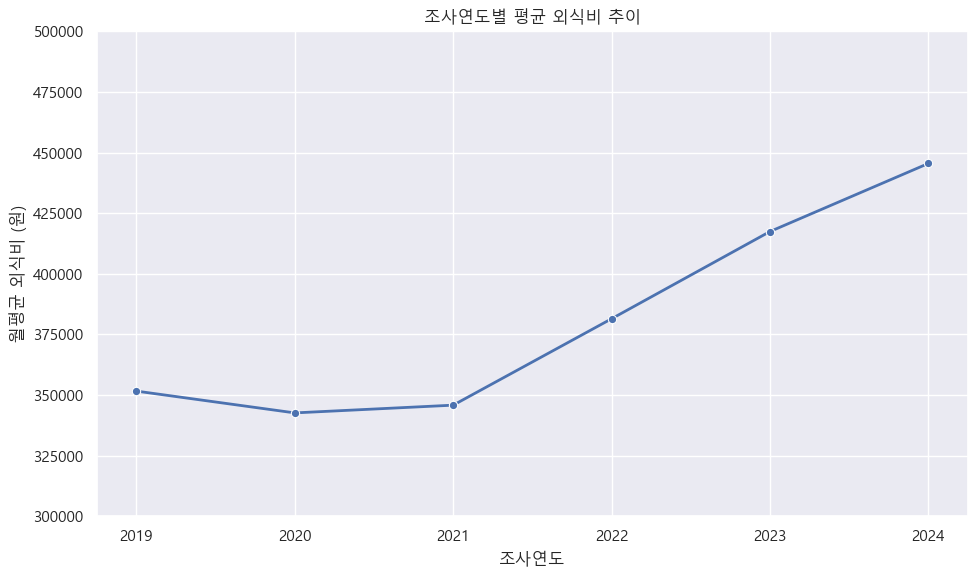

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_outfood, x='조사연도', y='외식', marker='o', linewidth=2)

plt.title('조사연도별 평균 외식비 추이')
plt.xlabel('조사연도')
plt.ylabel('월평균 외식비 (원)')

plt.ylim(300000, 500000)
plt.grid(True)
plt.tight_layout()
plt.show()


#### 5-2. 연령층별 외식지출이 지난 5년 동안 어떻게 변화하였는지 시각화

In [27]:
age_outfood = young2.groupby(['조사연도', '연령그룹'])['외식'].mean().round().astype(int).reset_index()
print(age_outfood)

    조사연도    연령그룹      외식
0   2019  30대 초반  378288
1   2019     대학생  302967
2   2019   사회초년생  357890
3   2020  30대 초반  359642
4   2020     대학생  295643
5   2020   사회초년생  349298
6   2021  30대 초반  358628
7   2021     대학생  300387
8   2021   사회초년생  351807
9   2022  30대 초반  386958
10  2022     대학생  337670
11  2022   사회초년생  393218
12  2023  30대 초반  435274
13  2023     대학생  365570
14  2023   사회초년생  420397
15  2024  30대 초반  471273
16  2024     대학생  368099
17  2024   사회초년생  449643


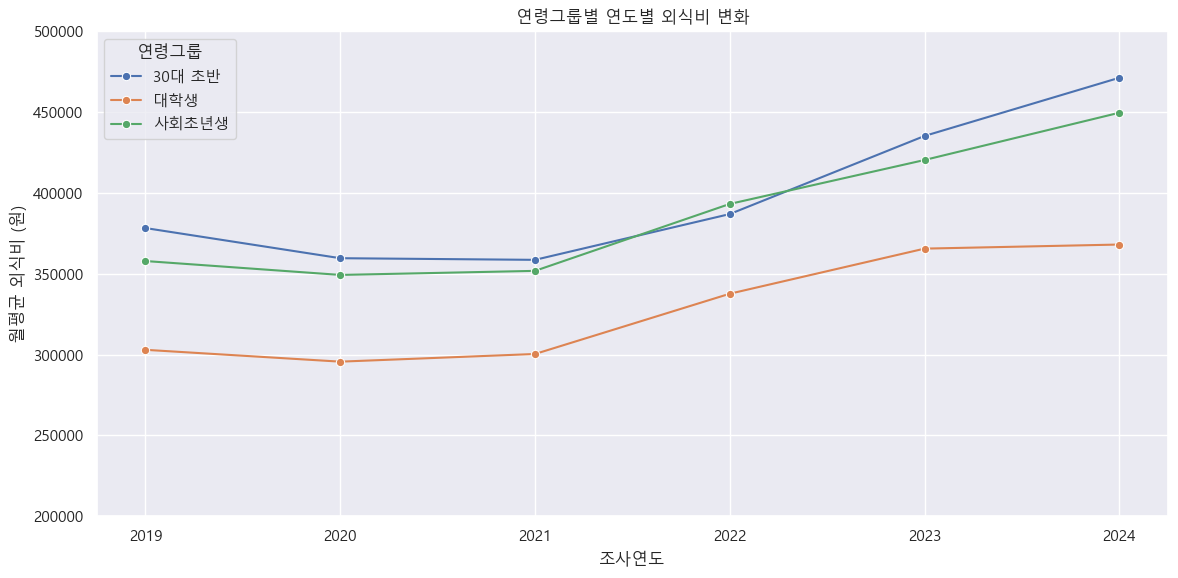

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_outfood, x='조사연도', y='외식', hue='연령그룹', marker='o')
plt.title('연령그룹별 연도별 외식비 변화')
plt.xlabel('조사연도')
plt.ylabel('월평균 외식비 (원)')
plt.ylim(200000, 500000)
plt.grid(True)
plt.legend(title='연령그룹')
plt.tight_layout()
plt.show()

#### 5-3. 직업군별 연도별 외식비 변화

In [73]:
job_outfood = young2.groupby(['조사연도', '직업군'])['외식'].mean().dropna().round().astype(int).reset_index()
print(job_outfood)

# 2019년 1번 직업군 결측치? why?
# 2022년 6번 직업군 결측치? why?

    조사연도     직업군      외식
0   2019     사무직  332107
1   2019  서비스/판매  335360
2   2019   육체노동자  349486
3   2019     전문가  381964
4   2020     사무직  344298
5   2020  서비스/판매  337059
6   2020   육체노동자  343500
7   2020     전문가  344276
8   2021     사무직  359104
9   2021  서비스/판매  337351
10  2021   육체노동자  338025
11  2021     전문가  344388
12  2022     사무직  399160
13  2022  서비스/판매  350432
14  2022   육체노동자  409373
15  2022     전문가  374137
16  2023     사무직  426535
17  2023  서비스/판매  363107
18  2023   육체노동자  470812
19  2023     전문가  412301
20  2024     사무직  463562
21  2024  서비스/판매  386641
22  2024   육체노동자  444343
23  2024     전문가  460913


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_19700\2406716654.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_outfood = young2.groupby(['조사연도', '직업군'])['외식'].mean().dropna().round().astype(int).reset_index()


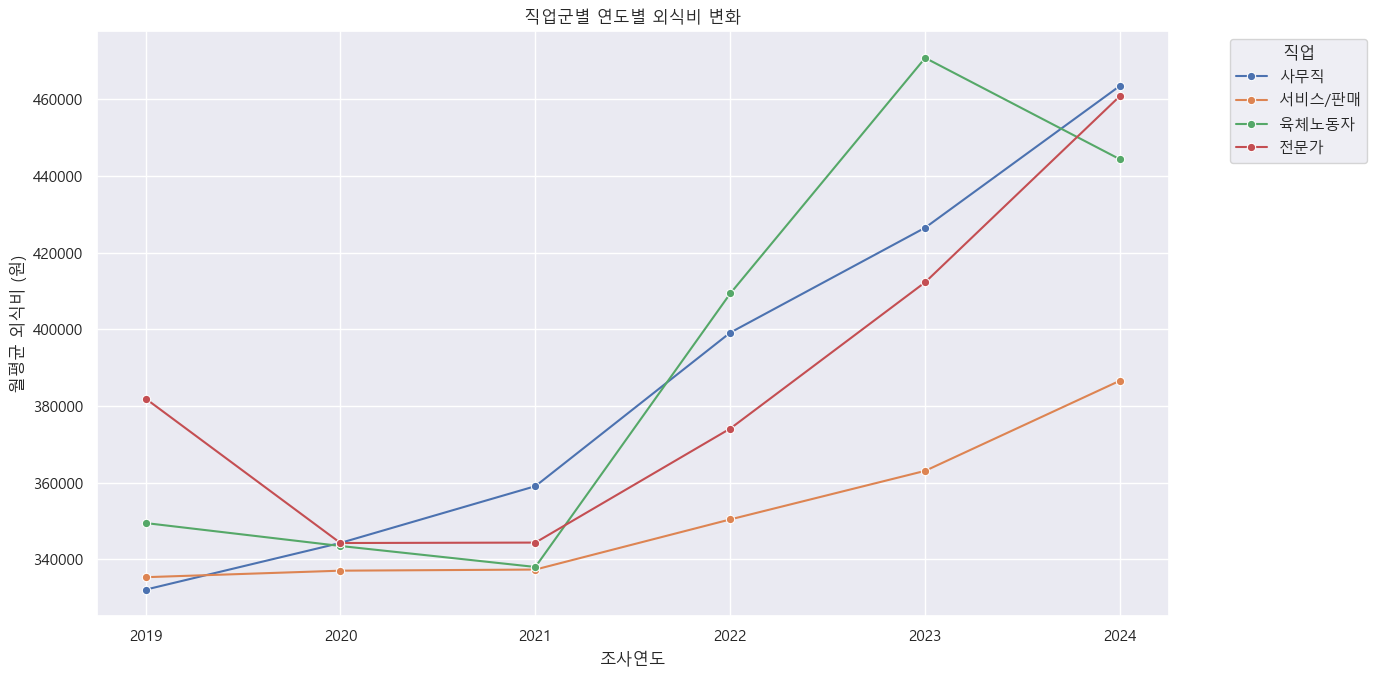

In [74]:
# 결측 평균값 제외하고 시각화
job_outfood_clean = job_outfood.dropna(subset=['외식'])

plt.figure(figsize=(14, 7))
sns.lineplot(data=job_outfood_clean, x='조사연도', y='외식', hue='직업군', marker='o')
plt.title('직업군별 연도별 외식비 변화')
plt.xlabel('조사연도')
plt.ylabel('월평균 외식비 (원)')
plt.grid(True)
plt.legend(title='직업', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 직업군에 대한 조작적 정의가 필요할 듯, 굳이 세분화해서 볼 필요가 없을 것 같다.

#### 5-4. 소득별 연도별 외식비 변화

In [75]:
income_outfood = young2.groupby(['조사연도', '소득군'], observed=True)['외식'].mean().dropna().round().astype(int).reset_index()
print(income_outfood)

    조사연도           소득군      외식
0   2019  200-300만원 미만  332308
1   2019  300-400만원 미만  410947
2   2019      400만원 이상  490789
3   2019       최저시급 이하  254473
4   2020  200-300만원 미만  334398
5   2020  300-400만원 미만  369482
6   2020      400만원 이상  414785
7   2020       최저시급 이하  273134
8   2021  200-300만원 미만  341144
9   2021  300-400만원 미만  384289
10  2021      400만원 이상  408156
11  2021       최저시급 이하  258446
12  2022  200-300만원 미만  352493
13  2022  300-400만원 미만  403788
14  2022      400만원 이상  474076
15  2022       최저시급 이하  290887
16  2023  200-300만원 미만  364947
17  2023  300-400만원 미만  415811
18  2023      400만원 이상  534655
19  2023       최저시급 이하  311993
20  2024  200-300만원 미만  387515
21  2024  300-400만원 미만  466338
22  2024      400만원 이상  535253
23  2024       최저시급 이하  330957


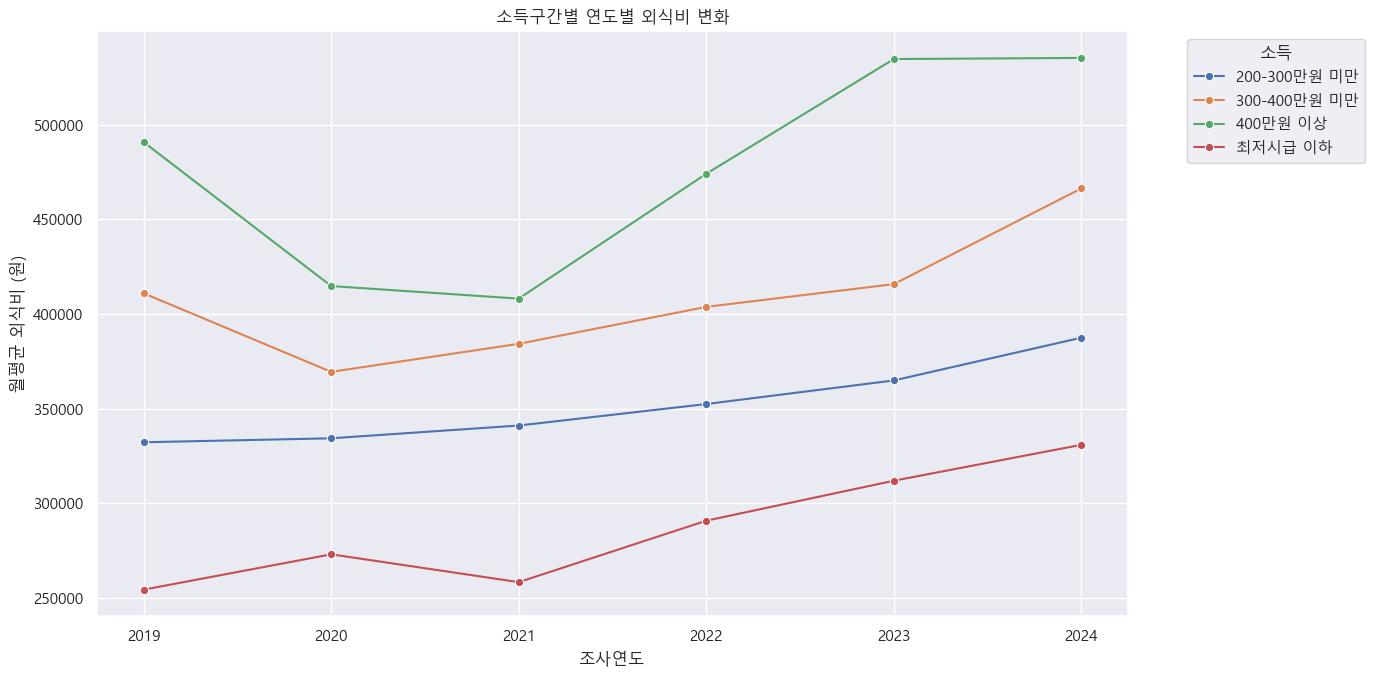

In [76]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=income_outfood, x='조사연도', y='외식', hue='소득군', marker='o')
plt.title('소득구간별 연도별 외식비 변화')
plt.xlabel('조사연도')
plt.ylabel('월평균 외식비 (원)')
plt.grid(True)
plt.legend(title='소득', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 논의가 필요한 점: 물가지수를 사용하여 표준화하는 방법이 필요할 듯
1. 외식 지출 증가는 물가 상승과 소비 패턴 변화 두 가지 요인으로 해석 가능
2. 물가 지수를 적용해 외식 지출을 표준화하면 실질 소비 변화를 평가할 수 있음.
3. 표준화 방법: 과거 연도의 지출을 최신 연도 물가 지수에 맞춰 재조명
4. 물가 조정 후 비교를 통해 물가 상승 영향과 순수 소비 변화 구분
5. 실질 지출 비교를 통해 외식 지출 증가 원인 분석과 정책적 해석이 가능할 듯

### 6. 물가지수 데이터 확보
- 연도별 물가지수를 데이터프레임으로 정리하여 분석 데이터와 연동 가능하도록 준비
- 외식 지출 데이터셋에 조사연도별 물가지수를 merge

### 7. 물가지수를 이용한 외식 지출 표준화 계산
- 기준연도(예: 최신연도 또는 특정 기준연도)를 설정하여 각 연도의 외식 지출을 기준연도 물가지수를 기준으로 재조정(표준화)
- 조정외식비 = 외식비 * (기준연도물가지수 / 해당연도물가지수)


### 8. 통계적 비교 및 시각화